In [1]:
from optionsmonkey.api import get_options_chain
from optionsmonkey.utils import get_fridays_date


friday_in_3_weeks = get_fridays_date(weeks_until=3)
options = get_options_chain('MSFT', friday_in_3_weeks)
options.calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,MSFT240315C00140000,2024-02-15 16:07:16+00:00,140.0,265.30,263.55,265.55,0.00,0.0,5.0,15,1.744142,True,REGULAR,USD
1,MSFT240315C00145000,2023-09-22 15:53:18+00:00,145.0,177.30,182.75,186.00,0.00,0.0,10.0,7,0.000010,True,REGULAR,USD
2,MSFT240315C00150000,2023-11-28 19:40:41+00:00,150.0,233.30,224.35,228.80,0.00,0.0,3.0,6,0.000010,True,REGULAR,USD
3,MSFT240315C00160000,2023-11-22 19:26:23+00:00,160.0,220.78,214.05,217.20,0.00,0.0,1.0,11,0.000010,True,REGULAR,USD
4,MSFT240315C00170000,2024-02-01 15:01:04+00:00,170.0,237.05,233.65,235.70,0.00,0.0,1.0,2,1.491213,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,MSFT240315C00520000,2024-02-16 20:34:41+00:00,520.0,0.03,0.02,0.04,-0.01,-25.0,9.0,546,0.339850,False,REGULAR,USD
74,MSFT240315C00525000,2024-02-13 20:25:57+00:00,525.0,0.03,0.02,0.04,0.00,0.0,2.0,762,0.350592,False,REGULAR,USD
75,MSFT240315C00530000,2024-02-15 18:29:57+00:00,530.0,0.02,0.01,0.04,0.00,0.0,100.0,999,0.361335,False,REGULAR,USD
76,MSFT240315C00535000,2024-02-15 20:41:18+00:00,535.0,0.01,0.02,0.03,0.00,0.0,2.0,582,0.363288,False,REGULAR,USD


In [2]:
from optionsmonkey.utils import coerce_to_multiple

strike = coerce_to_multiple(options.underlying.regular_market_price + 15)
options_at_strike = options.calls[options.calls['strike'] == strike]
options_at_strike

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
53,MSFT240315C00420000,2024-02-16 20:58:23+00:00,420.0,3.65,3.5,3.65,-0.63,-14.719627,4882.0,14688,0.214424,False,REGULAR,USD


# covered call

/Users/mnhmbp/PycharmProjects/optionsmonkey/venv/lib/python3.10/site-packages/pydantic/main.py:171: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.__pydantic_validator__.validate_python(data, self_instance=self)


P/L profile diagram:
--------------------
The vertical green dashed line corresponds to the position of the stock's spot price. The right and left arrow markers indicate the strike prices of calls and puts, respectively, with blue representing long and red representing short positions.


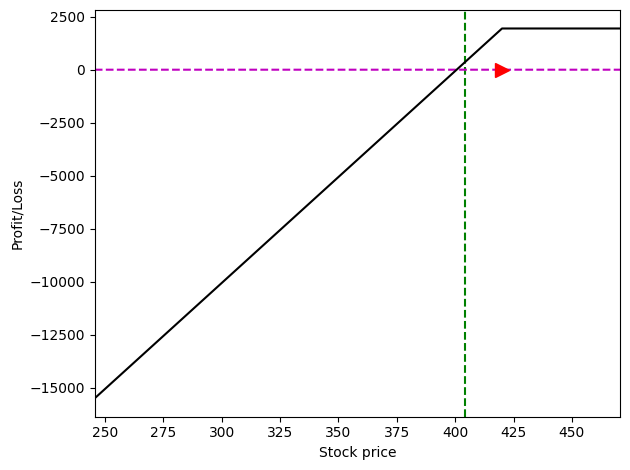

In [3]:
from optionsmonkey.plot import plot_pl
from optionsmonkey.strategies import generate_strategies
from optionsmonkey.models import Inputs
from optionsmonkey.engine import StrategyEngine

strategy = generate_strategies('covered-call', strike, options_at_strike.bid, friday_in_3_weeks)

inputs = Inputs(
    stock_price=options.underlying.regular_market_price,
    volatility=options_at_strike.impliedVolatility,
    interest_rate=0.0415,
    min_stock=options.underlying.fifty_two_week_low,
    max_stock=options.underlying.fifty_two_week_high + 50,
    target_date=friday_in_3_weeks,
    strategy=strategy, 
)

st = StrategyEngine(inputs)
outputs = st.run()

plot_pl(st)
